In [1]:
# add the 'src' as root folder, to find other modules in the project
import sys
sys.path.append("../../")

In [2]:
from torch.distributions import Normal, Independent
from utilities.analysis import distribution_analysis, frequency_analysis
from utilities.simulator import swing_equation
import torch

In [3]:
# Model for data simulation
simulator_model = swing_equation.Swing()

# True parameters for the swing equation
true_parameters = {
    'c_1': 0.01,
    'c_2': 0.0001,
    'P_0': 0.001,
    'P_1': 0.000001,
    '\epsilon': 0.001
}

# True parameters for the swing equation
true_parameters_wo_noise = {
    'c_1': 0.01,
    'c_2': 0.0001,
    'P_0': 0.001,
    'P_1': 0.000001,
    '\epsilon': 0
}

# true parameters
true_parameters_base = torch.tensor(list(true_parameters.values()))
true_parameters_base_wo_noise = torch.tensor(list(true_parameters_wo_noise.values()))

std_deviations_base = torch.tensor([0.001, 0.00001, 0.0001, 0.000001, 0.0001,])

# prior: Normal distributions around the true parameter value (with or without noise)
test_dist = Independent(Normal(loc=true_parameters_base, scale=std_deviations_base), 1)

# observation with true parameters
observation = simulator_model.simulator(true_parameters_base)
observation_wo_noise = simulator_model.simulator(true_parameters_base_wo_noise)

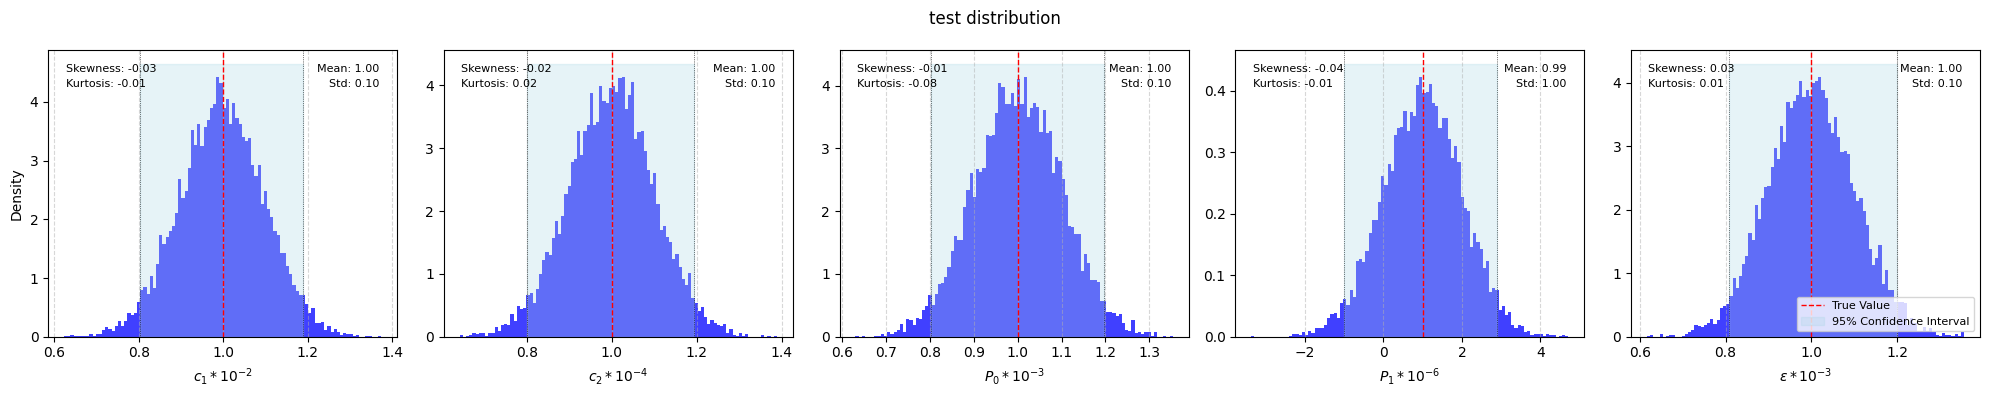

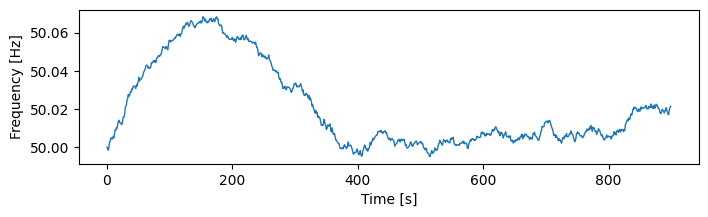

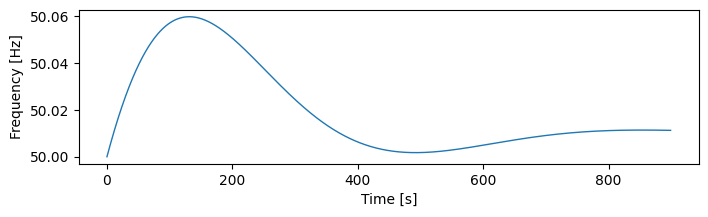

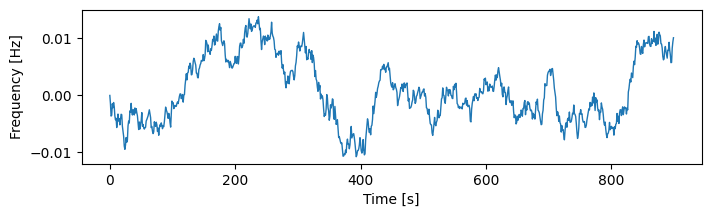

In [4]:
plt = distribution_analysis.DistributionAnalysis(true_parameters).plot_distribution_analytics(test_dist.sample((10000,)), "test distribution")
plt.show()

f_analysis = frequency_analysis.FrequencyAnalysis(simulator_model.dt, simulator_model.T)
plt = f_analysis.plot_frequency_analytics(observation)
plt.show()

plt = f_analysis.plot_frequency_analytics(observation_wo_noise)
plt.show()

plt = f_analysis.plot_frequency_analytics(observation - observation_wo_noise)
plt.show()